In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, t_train), (x_test, t_test) = mnist.load_data()

print("train shape: ", x_train.shape, "train label shape: ", t_train.shape)
print("test shape: ", x_test.shape, "test label shape: ", t_test.shape)
print("train label: ", t_train) # 학습데이터 정답 출력
print("test label: ", t_test) # 테스트데이터 정답 출력

train shape:  (60000, 28, 28) train label shape:  (60000,)
test shape:  (10000, 28, 28) test label shape:  (10000,)
train label:  [5 0 4 ... 5 6 8]
test label:  [7 2 1 ... 4 5 6]


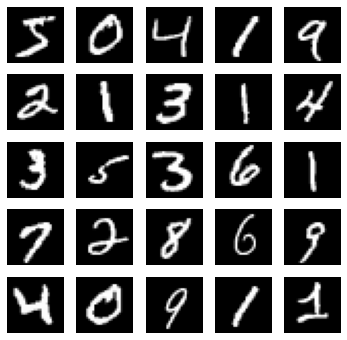

In [2]:
# 25개의 이미지 출력
plt.figure(figsize=(6,6))

for index in range(25): # 25개 이미지 출력
  plt.subplot(5, 5, index + 1) # 5행 5열
  plt.imshow(x_train[index], cmap='gray')
  plt.axis('off')
  # plt.title(str(t_train[index]))

plt.show()

In [3]:
# 학습 데이터 / 테스트 데이터 정규화 (Normalization)
x_train = (x_train - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)

# 정답 데이터 원핫 인코딩 (ont-hot encoding)
t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)
t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

In [4]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) # Flatten 을 이용해서 28 X 28 크기 2차원 벡터를 784 개의 1차원 벡터로 변환
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 정답을 ont-hot encoding 방식으로 나타내기 때문에 손실함수 loss = categorical_crossentropy
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics='accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 9s 5ms/step - loss: 0.3156 - accuracy: 0.9110 - val_loss: 0.1837 - val_accuracy: 0.9474
Epoch 2/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1459 - accuracy: 0.9577 - val_loss: 0.1431 - val_accuracy: 0.9584
Epoch 3/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1025 - accuracy: 0.9695 - val_loss: 0.1187 - val_accuracy: 0.9645
Epoch 4/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0781 - accuracy: 0.9767 - val_loss: 0.1090 - val_accuracy: 0.9670
Epoch 5/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0606 - accuracy: 0.9815 - val_loss: 0.1130 - val_accuracy: 0.9666
Epoch 6/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0471 - accuracy: 0.9863 - val_loss: 0.1114 - val_accuracy: 0.9674
Epoch 7/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0389 - accuracy: 0.9879 - val_loss: 0.1064 - val_accuracy:

In [6]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1514 - accuracy: 0.9739


[0.15142664313316345, 0.9739000201225281]

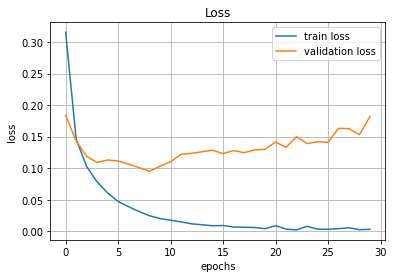

In [7]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

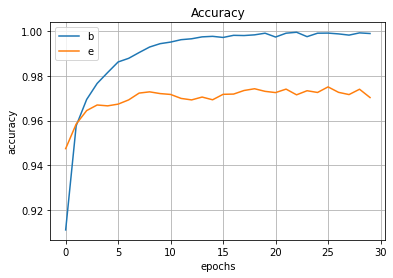

In [8]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend('best')

plt.show()

313/313 [==============================] - 1s 3ms/step


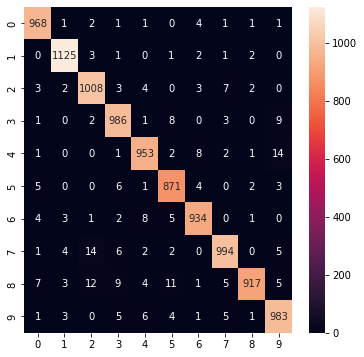

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6,6))
predicted_value = model.predict(x_test)
cm = confusion_matrix(np.argmax(t_test, axis=-1), np.argmax(predicted_value, axis=-1))
sns.heatmap(cm, annot=True, fmt='d')

plt.show()

In [10]:
print(cm)

for i in range(10):
  print(('label: %d\t (%d/%d)\taccuracy = %.3f') % (i, np.max(cm[i]), np.sum(cm[i]), np.max(cm[i])/np.sum(cm[i])))

[[ 968    1    2    1    1    0    4    1    1    1]
 [   0 1125    3    1    0    1    2    1    2    0]
 [   3    2 1008    3    4    0    3    7    2    0]
 [   1    0    2  986    1    8    0    3    0    9]
 [   1    0    0    1  953    2    8    2    1   14]
 [   5    0    0    6    1  871    4    0    2    3]
 [   4    3    1    2    8    5  934    0    1    0]
 [   1    4   14    6    2    2    0  994    0    5]
 [   7    3   12    9    4   11    1    5  917    5]
 [   1    3    0    5    6    4    1    5    1  983]]
label: 0	 (968/980)	accuracy = 0.988
label: 1	 (1125/1135)	accuracy = 0.991
label: 2	 (1008/1032)	accuracy = 0.977
label: 3	 (986/1010)	accuracy = 0.976
label: 4	 (953/982)	accuracy = 0.970
label: 5	 (871/892)	accuracy = 0.976
label: 6	 (934/958)	accuracy = 0.975
label: 7	 (994/1028)	accuracy = 0.967
label: 8	 (917/974)	accuracy = 0.941
label: 9	 (983/1009)	accuracy = 0.974
